# Tutorial 2 - Trending YouTube Videos Part 2
---

<img src="images/trending_videos_header.png" />

<i>This tutorial is based on these Kaggle notebooks: [Extensive USA Youtube](https://www.kaggle.com/kabure/extensive-usa-youtube-eda), [YouTube Trending Videos Analysis](https://www.kaggle.com/ammar111/youtube-trending-videos-analysis).</i>

In the last tutorial, we provided you with clean datasets - however, in reality, this is not always the case. Raw data can often be messy and requires some cleaning before being ready for the analyses. In this context, knowing how to visualize data can further help you with [exploratory data analysis (EDA)](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15). 

In this tutorial, we will continue with the [Trending YouTube Video Statistics dataset](https://www.kaggle.com/datasnaek/youtube-new) to illustrate how to do perform data handing. Please note that the described steps are just an example procedure for this specific dataset. While you can adapt many of these steps to your own projects, keep in mind that the methods that you apply need to be selected and adjusted based on the characteristics of your specific dataset.

Focusing on data handling and visualization, we will illustrate:
- How to do a first inspection of a dataset
- How to remove missing data
- How to import data from a JSON file
- How to impute missing data
- How to use a log transformation
- How to use visualizations to study relationships between variables

Through this notebook we will analyse: 
- Which type of YouTube videos receive how many views, likes, dislikes and comments
- How the different measures are related to one another


## Your tasks
---
1. __First part__: Import the Canadian dataset (CAvideos_mlbd.csv) and perform a first inspection.
2. __Second part__: Remove unimportant missing data from the dataset.
3. __Third part__: Parse a JSON file to add additional information to the dataframe
4. __Fourth part__: Impute missing data
5. __Fifth part__: Visualize data to study relations between measured variables



## Import Python libraries
---
You can find the official documentation of each library here: [Pandas](https://pandas.pydata.org/pandas-docs/stable/), [Numpy](https://numpy.org/doc/), [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/stable/index.html), [JSON](https://docs.python.org/3/library/json.html), [random](https://docs.python.org/3/library/random.html), [missingno](https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import random
import missingno

## Data import and first inspection
---
In the last tutorial, our initial datasets (US and GB) were already clean. Therefore we did not have to do any data cleaning before our analyses. In this tutorial, we will work with the Canadian dataset (CA). 

Work through the following cells to import the data and perform a first inspection.

In [2]:
### EXERCISE CELL ###

# Import data from "CAvideos_mlbd.csv" to pandas dataframe "df_yout"
df_yout = #----put your code here----

SyntaxError: invalid syntax (<ipython-input-2-cc57dacf7ec0>, line 4)

In [3]:
### EXERCISE CELL ###

# Examine first rows of the dataframe
#----put your code here----

In [4]:
### EXERCISE CELL ###

# Use a pandas function to output a summary of the dataframe describing the columns, datatypes and non-null values of each column
#----put your code here----

In [5]:
### EXERCISE CELL ###

# Use a pandas function to output some descriptive statistics about the data (mean, std, min, max, quartiles etc.)
#----put your code here----

__Question:__ Based on a first inspection of the above cells, do we need to do some data cleaning? If yes, why? If no, why not?

Put your answer in the cell below.

In [6]:
### EXERCISE CELL ###

#----put your answe here----

## Removing data
---

The "easiest way" to deal with missing data is to remove them. However, before doing so, it should be investigated whether it is reasonable to remove this data. Often, removing is not the best choice because it will reduce statistical power of the data set and potentially introduce a bias. Nevertheless, in some cases, data can be removed without issues. In the following, we will present some of these cases.

### Videos flagged as having errors or have been removed

Let's first look at the videos that are already flagged to have issues by the dataset itself (column video_error_or removed).

In [7]:
# Display all the videos that had errors or were removed
df_yout[df_yout['video_error_or_removed'] == 1]

NameError: name 'df_yout' is not defined

We can see there is a small number of entries that were flagged with having errors or being removed. Some of them don't even have proper video titles. We don't know exactly why these videos were flagged, but to be safe and given that this subset is considerably small with respect to the entire set, we can remove these entries. Let's do this.

__Hint:__ Use pandas drop function. 

In [13]:
### EXERCISE CELL ###

# Remove flagged videos from the dataset

#----put your code here----

In [9]:
# Check if videos were sucessfully removed
df_yout[df_yout['video_error_or_removed'] == 1]

NameError: name 'df_yout' is not defined

### Visualizing missing data

Next, let's have a closer look at the missing data in our dataset. Using the info() function we have seen that the columns sometimes contain empty values. To facilitate the anaylsis of this missing data, we will use the [missingno](https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python) library, that provides us with a very useful way to visualize missing data.

In [10]:
# Use missingno library to visualize empty cells in the dataframe
missingno.matrix(df_yout,figsize=(20,20), fontsize=12)

NameError: name 'df_yout' is not defined

__Question:__ From the missingno graph, which "types" of missing data can you identify?

Put your answer in the cell below.

In [11]:
### EXERCISE CELL ###

#----put your answer here----

### Empty rows

Let's now have a look at the rows with only empty values.

In [12]:
# Display rows with all empty values
df_yout[df_yout.isna().all(axis=1)]

NameError: name 'df_yout' is not defined

We can see that there are 2123 rows that are completely empty. For this kind of data, there is no problem with removing it. Let's do this.

__Hint:__ Use pandas dropna() function, but be careful to specify the correct parameters.

In [47]:
### EXERCISE CELL ###

# Remove rows with these indices from the dataframe
#----put your code here----

In [14]:
# Check if completely empty rows were removed 
df_yout[df_yout.isna().all(axis=1)]

NameError: name 'df_yout' is not defined

### Rows with only video_id

Let's now have a look at the rows with only values for video_id and empty values for all other columns.

In [15]:
# Display rows with empty values for treding_date
df_yout[df_yout['trending_date'].isna()]

NameError: name 'df_yout' is not defined

We can see that there are another 320 rows where data is missing for all columns except for video_id. But also the video_id column does not look meaningful. It seems that with these rows there was something wrong during the data collection. Therefore, we can also remove this data.

In [16]:
### EXERCISE CELL ###

# Remove videos with only video_ids

#----put your code here----

In [17]:
# Check if data was removed
df_yout[df_yout['trending_date'].isna()]

NameError: name 'df_yout' is not defined

In [18]:
# Final check if there are still empty cells in the dataset
df_yout.info()
missingno.matrix(df_yout,figsize=(20,20), fontsize=12)

NameError: name 'df_yout' is not defined

Now we're left only with rows that have values in all columns. The only exeception is the description column, but here it is possible to have a few empty values, since not all YouTube videos always include a description.

## Adding category names from JSON files
---
Before we continue with the data cleaning, let's add the category names to the dataframe - doing this will facilitate the next steps.

If you remember well, in the last tutorial we added the category names by manually assigning them to the dataframe. In this tutorial we would like to illustrate how we can do the same by parsing the information from the JSON file supporting the dataset.
Before you dive into the code, try to open the JSON file to get a feeling of how it is structured. There are many offline and online JSON viewers available. A list of examples can be found [here](https://prowebscraper.com/blog/best-json-viewer-tools-compared-for-developers/). In Noto, you can also view the file by just doubleclicking on it. 

Knowing how to parse data from JSON files is useful, because in many cases your main dataset can also be stored as JSON files.

In the following, we will use a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), a Python data structure which often can be quite helpful.

In [19]:
# Create an empty dictionary
category_id = {}

# Open supporting JSON file
with open('CA_category_id.json', 'r') as f:
    data = json.load(f)
    # Fill dictionary with relevant information from the JSON file
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']
        
category_id

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

As you can see, we created a dictionary associating the category_id with the corresponding category names based on the information from the JSON. Now we just need to integrate that information in our dataframe. 

__Hint 1:__ Use pandas map() function

__Hint 2:__ Note that the numbers from the dictionary don't have decimals, while our category_id column has. In this case the mapping will not work. Therefore, we will first convert category_id to int to remove the decimals.



In [54]:
### EXERCISE CELL ###

#----put your code here----

In [20]:
# Check if category_name column was inserted correctly
df_yout.head(3)

NameError: name 'df_yout' is not defined

## Data imputation
---

Let's now continue with the data cleaning and investigate why the minimum of the views was indicated as -100. Negative values for views don't make sense, so let's see how we can replace them with more reasonable values.

### Imputation of missing views data

Let's first take a look at the concerned rows of videos that are missing the views data.

In [21]:
### EXERCISE CELL ###

# Display all rows with negative values for views 
#----put your code here----

It seems that we have 499 rows for which the data for views is invalid. How should we handle these values? Since all the other columns seem to contain valuable data, it would not make sense to just delete the rows like we did before. Instead, we could try to find ways to replace these invalid values by more resonable ones. This process is called __imputation__ and there are multiple ways to this. A summary of different methods can for instance, be found [here](https://www.researchgate.net/publication/49660163_Best_Practices_for_Missing_Data_Management_in_Counseling_Psychology).

Note that there is not ONE optimal method for data imputation. Which method to apply, strongly depends on your data. Therefore, it is crucial to gain as much knowledge as possible about the missing data in order to select appropriate methods.

In the following, we will perform different analyses to find out, what could be a meaningful way to impute missing data _for this specific dataset_. With respect to the methods in the above-mentioned reference, the method applied here can be classified as a mix of pattern-matching imputation and regression substitution.

Let's check if the subset of data with missing views is substantially different from the rest.

In [22]:
# Extract subset with negative values for views
df_negatives = df_yout[df_yout['views'] < 0]
# Extract subset without negative values for views
df_rest = df_yout[df_yout['views'] >= 0]

NameError: name 'df_yout' is not defined

In [23]:
# Display descriptive statistics for df_negatives
df_negatives.describe()

NameError: name 'df_negatives' is not defined

In [24]:
# Display descriptive statistics for df_rest
df_rest.describe()

NameError: name 'df_rest' is not defined

NameError: name 'df_negatives' is not defined

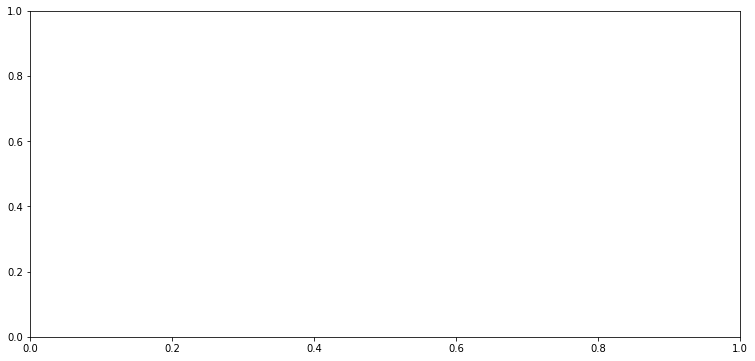

In [25]:
# Plot distribution of video categories for both subsets (taken from Tutorial 1.2)

plt.figure(figsize = (28,6))

order_categories = category_id.values()

plt.subplot(121)
g = sns.countplot(x=df_negatives['category_name'], palette="Set2", order=order_categories)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Counts by video category CA (missing views)", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
#g.set(ylim=(0, 15000))

plt.subplot(122)
g = sns.countplot(x=df_rest['category_name'], palette="Set2", order=order_categories)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Counts by video category CA (rest)", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
#g.set(ylim=(0, 15000))

plt.show()


The descriptive statistics for both subgroups show some differences - however, given that the samples in both subsets are very different (499 vs 38232), it is difficult to draw some conclusions. The distribution of categories in both subsets are overall similar, with the difference that the music category is much higher presented in the subset with missing views. Removing this data could therefore introduce a bias. But as mentioned before, the subset with missing views is much smaller than the other subset, therefore, it is hard to conclude if there is some pattern in the missing data. Nevertheless, we can still try to find out how to impute the missing data. 

To select a proper imputation methos. let's take a closer look at the subset of videos with missing views. Are the videos all different?

In [26]:
# Use the nunique function to determine if the videos in df_negatives are all different
df_negatives.nunique()

NameError: name 'df_negatives' is not defined

It can be observed that from the 499 rows, we have 499 unique video_ids, i.e. the videos with missing views are all different. Remember that from the last tutorial we observed that most videos are trending for multiple days. Maybe we can infer the missing data from the other trending days of the same video? Let's look at the all the entries for a random video in df_negatives.

In [27]:
# Choose one video from df_negatives at random and display all entries of this video in df_yout - implemented in a way such that it can easily be rerun it for several videos one after the other.
df_example = df_yout[df_yout.video_id == df_negatives.iloc[random.randint(1,500)]['video_id']].reset_index()
display(df_example)

NameError: name 'df_yout' is not defined

If you run the above cell multiple times for different videos, you can see that for all videos, there are multiple entries in df_yout. It is always the first one (earliest date) that is missing the views, while the subsequent ones all have meaningful values. Maybe we can use these values to infer the one that is missing? Let's try to visualize the views for the example chosen above:

In [28]:
### EXERCISE CELL ###

# Plot the values for views for all entries of the video except the first one
#----put your code here----

If you have plotted the views for several examples, you can see that views are increasing with their trending days (which is quite logical). So we know that the missing value for the first entry is probably lower than all the others. How can we estimate that value? As it can be observed from the graphs, one reasonable method could be linear regression. In Python, this can be very easily implemented using the [scikit-learn library](https://scikit-learn.org/stable/index.html).

The following steps can also be found this basic tutorial: https://realpython.com/linear-regression-in-python/

In [29]:
# Import linear regression models from scikit-learn
from sklearn.linear_model import LinearRegression

In [30]:
# Define regressors x and predictors y based on data from example video
x = np.arange(1,df_example.shape[0]).reshape((-1, 1))
y = np.array(df_example.iloc[1:,8])

# Define model
model = LinearRegression().fit(x, y)

# Output model parameters
print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Estimate missing views value (of course we could have also just directly use the value of model.intercept, since we are estimating the value at 0)
views_est = model.predict(np.array([0]).reshape((-1, 1)))
print('estimate for missing views value:', views_est)

NameError: name 'df_example' is not defined

Now that we have found a reasonable solution to imputate the missing views data, we just have to implement it for all the videos with missing views values in df_yout.

In [31]:
### EXERCISE CELL ###

# Iterate over all rows of df_negatives and impute values
#----put your code here----

Now let's check if our manipulations worked:

In [32]:
# Display all rows with views smaller than 0
df_yout.loc[df_yout['views'] < 0]

NameError: name 'df_yout' is not defined

In [33]:
# Display descriptive statistics for clean dataset
df_yout.describe()

NameError: name 'df_yout' is not defined

There are no rows with negative entries views left and the minimums for the views columns now also seems to be reasonable. 

We can now move on the the last part of this tutorial.

## Data visualizations
---
Let's now analyze the clean dataset by looking at the overall distributions of views, likes, dislikes and comments. 

### Distribution of views, likes, dislikes and comments

NameError: name 'df_yout' is not defined

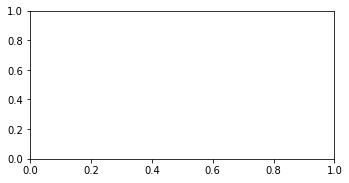

In [34]:
# Create a new figure with a width of 12 and a height of 6
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.distplot(df_yout['views'])
g1.set_title("VIEWS DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes'],color='green')
g2.set_title('LIKES DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes'], color='r')
g3.set_title("DISLIKES DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_count'], color='k')
g4.set_title("COMMENTS DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

We can see that all the plots are very right skewed. This will have an effect on data visualizations later on. One way to correct for this is to apply a [log transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9).

In [35]:
# Create new columns with transformed values using the Numpy log function.
df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
df_yout['views_log'] = np.log(df_yout['views'] + 1)
df_yout['dislikes_log'] = np.log(df_yout['dislikes'] + 1)
df_yout['comment_log'] = np.log(df_yout['comment_count'] + 1)

NameError: name 'df_yout' is not defined

__Question:__ Why do we add 1 in each transformation?

NameError: name 'df_yout' is not defined

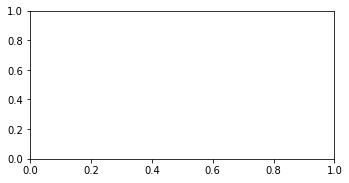

In [36]:
# Create new distribution plots with transformed data
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_yout['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_log'], color='k')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Views by category

Let's now plot the views by category using [Seaborn's boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function. To see the effect of the log transformation, plot the data of the original views values in one subplot and the log transformed data in another subplot next to it.  


In [37]:
### EXERCISE CELL ###

# Plot data for original data in left subplot and log transformed data in right subplot
#----put your code here----

### Likes by category

Now do the same for the likes.

In [38]:
### EXERCISE CELL ###

# Plot data for original data in left subplot and log transformed data in right subplot
#----put your code here----

### Dislikes by category</h3>

Now do the same for the dislikes.

In [39]:
### EXERCISE CELL ###

# Plot data for original data in left subplot and log transformed data in right subplot
#----put your code here----

### Comments by category

In [40]:
### EXERCISE CELL ###

# Plot data for original data in left subplot and log transformed data in right subplot
#----put your code here----

You can see that the log transformation helped to visualize some of the differences between categories which would be harder to observe in the original (skewed) data. For instance, it can be seen, that videos from the Movies category have more views and receive more likes than videos from the Shows category. If you observe well, you can also see that there are some similar trends in all four variables. To better observe these relations between variables, we can try to visualize the data using scatter plots.

### Scatter plots

To see relations between variables, let's now use [Seaborn's scatterplot](http://seaborn.pydata.org/generated/seaborn.scatterplot.html) function. Prepare scatter plots for views vs. likes/dislikes/comments. To see the effect of the log transformation, plot the data of the original views values in one subplot and the log transformed data in another subplot next to it. If yo want all plots to fit in one figure, how would you organize the subplots?


In [41]:
### EXERCISE CELL ###

#----put your code here----

We can see that indeed, likes, dislikes and views seem to be correlated with the views. The correlation seems to be a bit stronger for dislikes and a bit weaker for comments.

### Correlations between variables

As a last exercise of this tutorial, we want to introduce correlation matrices. Pandas [corr function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) allows you to easily calculate correlations between columns of a dataframe, with the possibility to specify the method of correlation (e.g. pearson, kendall etc.). However, we are not interested in correlations between all columns of our YouTube dataframe, but only the ones related to views, likes, dislikes and comments. So before you calculate the correlations, extract a subset of only these columns. Finally, calculate the correlations and visualize them using a Seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [42]:
### EXERCISE CELL ###

#----put your code here----


The heatmap confirms our observations from the last section. We can see that the strongest correlations can be found between views and dislikes, while the correlation between comments and views is the weakest among all combinations (though still strongly correlated).

## Summary
---
In this notebook, we have seen several important aspects of data handling. We have shown how data can be parsed from JSON files. We have illustrated how missing data can be deleted or imputed with reasonable values. We have shown how different representations can help you gain more insight into datasets, in order to apply appropriate data cleaning methods. Many ideas of the data cleaning procedure described in this notebook can be adapted to other projects. However, always keep in mind that each data set is different and it is crucial to gain as much knowledge about your data as best as possible in order to handle it appropriately. Finally, we have shown some examples of plots (histograms, boxplots, scatter plots and heatmaps) that can help you in exploratory data analysis. In this context, we have also introduced the log transformation as a way to make differences in right skewed data more visible.